# <center>Metody Numeryczne</center>

# Laboratorium 6: Iteracyjne równania liniowe i macierze rzadkie


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.


Dana jest prostokątna, [rzadka](https://en.wikipedia.org/wiki/Sparse_matrix) macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor kolumnowy zmiennych,
- $\mathbf{b}$ - wektor kolumnowy wyników prawej strony równania. 

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

%load_ext memory_profiler

---

### **Zadanie 1.**

W macierzach rzadkich większość elementów jest zerami, więc przechowywanie całych macierzy w pamięci jest nieefektywne. W celu optymalizacji macierze te zapisuje się w przeznaczonych do tego [formatach przechowywania danych](https://docs.scipy.org/doc/scipy/reference/sparse.html#usage-information), jakie udostępnia m.in. moduł [`scipy.sparse`](https://docs.scipy.org/doc/scipy/reference/sparse.html). W ramach laboratorium korzystać będziemy z formatu [Compressed Sparse Column (CSC)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csc_array.html).

1. Zapoznaj się z różnymi formatami przechowywania macierzy rzadkich w pamięci.

2. Dla $10$ równo rozmieszczonych wartości $m$ z zakresu $[100, 10000]$ wygeneruj macierze rzadkie wymiaru $m \times m$ używając [`sp.sparse.random_array()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.random_array.html) z parametrem `density=0.01` oraz parametrem `format` ustawionym tak, aby wygenerowane macierze zapisane zostały w formacie CSC.

2. Porównaj ile pamięci zajmują te same macierze zapisane w formacie `numpy.ndarray` oraz w formacie `scipy.sparse.csc_array`. W tym celu przekonwertuj kopie macierzy utworzonych w poprzednim punkcie do formatu `numpy.ndarray` używając odpowiedniej metody z modułu `scipy.sparse`. Wynik zaprezentuj na jednym wykresie typu *scatter plot*.

3. Opisz wnioski wynikające z wykresu.

> **Wskazówka:** Do obliczenia rozmiaru zmiennych skorzystaj z fragmentu kodu podanego poniżej.


In [2]:
# Fragment kodu wyznaczający ilość zużycia pamięci przez macierze (w bajtach).
# import main

# import numpy as np
# import scipy as sp
# import matplotlib.pyplot as plt
# from memory_profiler import memory_usage

# %load_ext memory_profiler

# n: np.ndarray = ...
# n_memory_size = n.nbytes

# s: sp.sparse.csc_array = ...
# s_memory_size = s.data.nbytes + s.indices.nbytes + s.indptr.nbytes

N          | CSC [MB]   | Dense [MB]
------------------------------------
100        | 0.00       | 0.08      
1200       | 0.17       | 10.99     
2300       | 0.61       | 40.36     
3400       | 1.34       | 88.20     
4500       | 2.33       | 154.50    
5600       | 3.61       | 239.26    
6700       | 5.16       | 342.48    
7800       | 6.99       | 464.17    
8900       | 9.10       | 604.32    
10000      | 11.48      | 762.94    


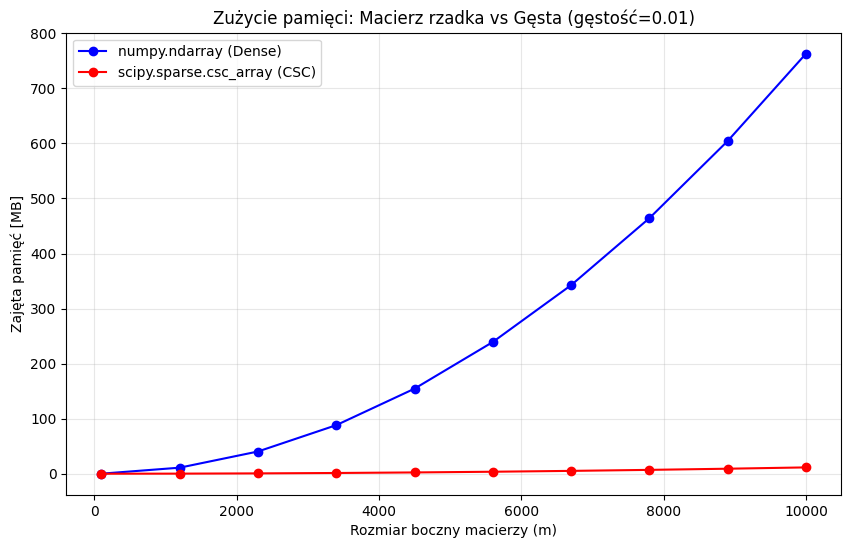

In [3]:
# ===== Twoja implementacja tutaj =====
# !python -m pip install numpy scipy matplotlib

import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt

# Parametry
m_values = np.linspace(100, 10000, 10, dtype=int)
density = 0.01

mem_csc = []
mem_dense = []

print(f"{'N':<10} | {'CSC [MB]':<10} | {'Dense [MB]':<10}")
print("-" * 36)

for m in m_values:

    sparse_matrix = sp.random_array((m, m), density=density, format='csc')

    dense_matrix = sparse_matrix.toarray()
    
    size_csc_bytes = (sparse_matrix.data.nbytes + 
                      sparse_matrix.indices.nbytes + 
                      sparse_matrix.indptr.nbytes)
    
  
    size_dense_bytes = dense_matrix.nbytes
    
  
    size_csc_mb = size_csc_bytes / (1024**2)
    size_dense_mb = size_dense_bytes / (1024**2)
    
    mem_csc.append(size_csc_mb)
    mem_dense.append(size_dense_mb)
    
    print(f"{m:<10} | {size_csc_mb:<10.2f} | {size_dense_mb:<10.2f}")


fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(m_values, mem_dense, 'bo-', label='numpy.ndarray (Dense)')
ax.plot(m_values, mem_csc, 'ro-', label='scipy.sparse.csc_array (CSC)')

ax.set_title(f'Zużycie pamięci: Macierz rzadka vs Gęsta (gęstość={density})')
ax.set_xlabel('Rozmiar boczny macierzy (m)')
ax.set_ylabel('Zajęta pamięć [MB]')
ax.legend()
ax.grid(True, alpha=0.3)

plt.show()

    




---

### **Zadanie 2.**

Korzystając z wiedzy zdobytej podczas realizacji **Zadania 1.** wykonaj polecenia.

1. Wygeneruj macierze rzadkie $\mathbf{A}$ i $\mathbf{B}$ o wymiarach $1000 \times 1000$. Zapisz je w formatach `scipy.sparse.csc_array` oraz `numpy.ndarray`.

2. Porównaj czas potrzebny na wykonanie mnożenia macierzowego $\mathbf{AB}$ dla macierzy zapisanych w formacie `numpy.ndarray` oraz `scipy.sparse.csc_array`.

3. Opisz z czego wynika różnica.

In [1]:
# ===== Twoja implementacja tutaj =====

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

%load_ext memory_profiler

size = 1000
A = sp.sparse.random(size, size, density=0.01, format='csc')
B = sp.sparse.random(size, size, density=0.01, format='csc')
saved_timing_A = %timeit -r 5 -n 10 -o A.toarray()@B.toarray()
print('Czas potrzebny na wymnożenie macierzy w formacie ndarray wynosi: {0: .2f} ms'.format(saved_timing_A.average*1000))
saved_timing_B = %timeit -r 5 -n 10 -o A@B
print('Czas potrzebny na wymnożenie macierzy w formacie rzadkim wynosi: {0: .2f} ms'.format(saved_timing_B.average * 1000))




15.6 ms ± 2.2 ms per loop (mean ± std. dev. of 5 runs, 10 loops each)
Czas potrzebny na wymnożenie macierzy w formacie ndarray wynosi:  15.63 ms
756 μs ± 411 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Czas potrzebny na wymnożenie macierzy w formacie rzadkim wynosi:  0.76 ms


---

### **Zadanie 3.**

Aby metody iteracyjne znalazły rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ należy zadbać o to aby macierz $\mathbf{A}$ była [diagonalnie zdominowana](https://en.wikipedia.org/wiki/Diagonally_dominant_matrix). Przekształcenie dowolnej macierzy do tej postaci jest skomplikowanym zagadnieniem, które nie będzie poruszane w ramach tego laboratorium. Na potrzeby zadania należy jedynie sprawdzić czy używana macierz posiada tę własność.

**Punkt 1.**

Zaimplementuj funkcję *`is_diagonally_dominant()`* sprawdzającą czy macierz jest diagonalnie zdominowana.

> **Wskazówka:** W implementacji nie należy używać pętli *for*, ponieważ biblioteka NumPy zawiera funkcje, które znacznie wydajniej iterują po elementach tablic typu `numpy.ndarray`. Lepiej skorzystać z funkcji [`np.sum()`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) oraz [`np.diagonal()`](https://numpy.org/doc/stable/reference/generated/numpy.diagonal.html).

<br>

**Punkt 2.**

Poniżej znajduje się zaimplementowana funkcja `generate_matrix()`. Przy jej pomocy wygeneruj macierz $\mathbf{A}$ o wymiarach $1000 \times 1000$. Następnie zweryfikuj czy wygenerowana macierz jest diagonalnie zdominowana. Wygeneruj również wektor wartości losowych $\mathbf{b}$ o długości $1000$.

<br>

**Punkt 3.**

Istnieje wiele metod iteracyjnego rozwiązywania równań, natomiast nie różnią się one znacząco od siebie w kwestii wywołania metody, dlatego w dalszej części zadania należy wybrać jedną z metod: [GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html) lub [Conjugate Gradient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html) i dla niej przeprowadzić dalszą analizę. 

1. Korzystając z funkcji *`residual_norm()`*, oraz macierzy zdefiniowanych w **Punkcie 2.**, zbadaj wpływ argumentów `rtol` i `maxiter` na działanie wybranej metody. Sporządź wykresy przedstawiające wartość normy residuum w zależności od zmiany podanych parametrów.

2. Opisz zaobserwowane zależności.

>**Wskazówka:** Metoda *Conjugate Gradient* wymaga aby macierz była dodatnio określona. Można to zapewnić poprzez podanie argumentu `is_symmetric=True` do funkcji `generate_matrix()`.


In [9]:
# Implementacja funkcji generate_matrix().

from scipy.sparse import diags_array, csc_array


def generate_matrix(m: int = 1000, is_symmetric: bool = False) -> csc_array:
    """Funkcja generująca rzadką, diagonalnie zdominowaną macierz rozmiaru m x m.

    Parameters:
        m (int): Wymiar macierzy.
        is_symmetric (bool): Czy macierz ma być symetryczna.

    Returns:
        (scipy.sparse.csc_array): Macierz rzadka, diagonalnie zdominowana (m,m).

    Raises:
        TypeError: Jeśli 'm' nie jest liczbą całkowitą lub 'is_symmetric' nie 
            jest wartością logiczną.
        ValueError: Jeśli 'm' jest mniejsze niż 5.
    """
    if not isinstance(m, int):
        raise TypeError(
            f"Argument 'm' musi być liczbą całkowitą, otrzymano: {type(m).__name__}."
        )
    if not isinstance(is_symmetric, bool):
        raise TypeError(
            f"Argument 'is_symmetric' musi być wartością logiczną, otrzymano: {type(is_symmetric).__name__}."
        )
    if m < 5:
        raise ValueError("Argument 'm' musi być większy lub równy 5.")

    if is_symmetric:
        num_upper_diags = np.random.randint(2, m // 2)
        diagonal_values = np.random.rand(num_upper_diags)
        matrix = diags_array(
            diagonal_values, offsets=np.arange(1, num_upper_diags + 1), shape=(m, m)
        )
        matrix = matrix + matrix.T
    else:
        num_upper_diags = np.random.randint(2, m // 2)
        num_lower_diags = np.random.randint(2, m // 2)
        diagonal_values = np.random.rand(num_upper_diags + num_lower_diags)
        matrix = diags_array(
            diagonal_values,
            offsets=np.arange(-num_lower_diags, num_upper_diags),
            shape=(m, m),
        )

    row_sums = np.asarray(matrix.sum(axis=1)).flatten()
    diagonal_vals = row_sums - np.abs(matrix.diagonal()) + np.random.rand(m)
    matrix.setdiag(diagonal_vals)

    return matrix.tocsc()

True
8.679004509681878e-05
None


[Text(0.5, 1.0, 'Zależność wyliczonej normy od wartości paramateru "maxiter"␣metody GMRES'),
 Text(0.5, 0, 'Wartość parametru "maxiter"'),
 Text(0, 0.5, 'Wartość normy residuum')]

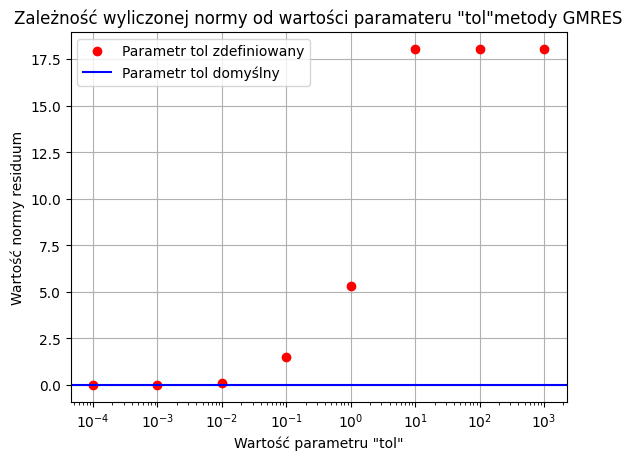

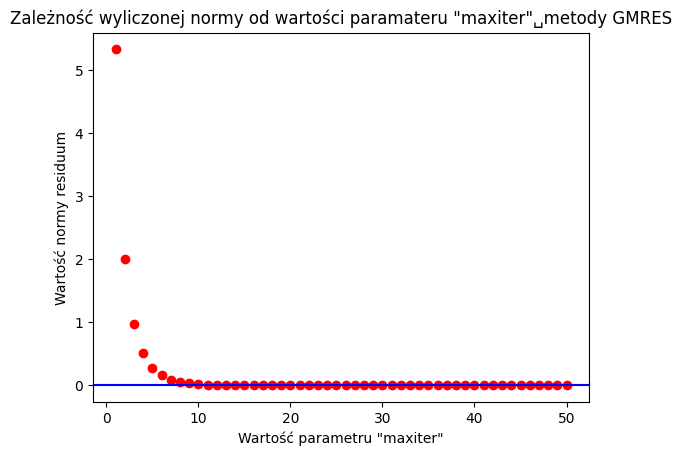

In [ ]:
# ===== Twoja implementacja tutaj =====
import numpy as np
import scipy as sp
import main

A = generate_matrix(1000)
b = np.random.rand(1000)
print(main.is_diagonally_dominant(A))
x_default = sp.sparse.linalg.gmres(A, b)[0]

resid_norm_default = main.residual_norm(A.toarray(), x_default, b)

print(resid_norm_default)

x_default2 = sp.sparse.linalg.gmres(A,b,rtol = 1e-4,maxiter = 10)
resid_norm_deafult2 = main.residual_norm(A.toarray(),x_default2,b)

print(resid_norm_deafult2)

new_tol = np.logspace(-4, 3, 8)
x_diftol = []
A2 = generate_matrix(1000)
for tol_value in new_tol:
    x_temp = sp.sparse.linalg.gmres(A2, b, rtol=tol_value)[0]
    x_diftol.append(main.residual_norm(A2.toarray(), x_temp, b))
x_diftol = np.asarray(x_diftol)
fig, ax = plt.subplots()
ax.semilogx(new_tol, x_diftol, 'ro', label='Parametr tol zdefiniowany')
ax.axhline(resid_norm_default, color='b', label='Parametr tol domyślny')
ax.set(title='Zależność wyliczonej normy od wartości paramateru "tol"metody GMRES',xlabel='Wartość parametru "tol"',ylabel='Wartość normy residuum')
ax.grid()
ax.legend()

maxits = np.linspace(1,50,50)
x_maxit = []

for maxiter_value in maxits:
    x_temp = sp.sparse.linalg.gmres(A2, b, maxiter=int(maxiter_value),restart=1)[0]
    x_maxit.append(main.residual_norm(A2.toarray(), x_temp, b))
x_maxit = np.asarray(x_maxit)

fig, ax = plt.subplots()
ax.plot(maxits, x_maxit, 'ro', label='Parametr maxiter zdefiniowany')
ax.axhline(resid_norm_default, color='b', label='Parametr maxiter domyślny')
ax.set(title='Zależność wyliczonej normy od wartości paramateru "maxiter"␣metody GMRES',xlabel='Wartość parametru "maxiter"',ylabel='Wartość normy residuum')


---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)